# **Blueberry Yield Project**

### By Nicole J. Soto

# Data & Problem Description

Based on:
https://www.kaggle.com/competitions/playground-series-s3e14

# Imports

In [1]:
# basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# sklearn helper
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# linear regression
from sklearn.linear_model import LinearRegression

# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# ridge regression
from sklearn.linear_model import Ridge

# lasso regression
from sklearn.linear_model import Lasso

# elasticnet regression
from sklearn.linear_model import ElasticNet

# knn regression
from sklearn.neighbors import KNeighborsRegressor

# decision tree regression
from sklearn.tree import DecisionTreeRegressor

# support vector regression
from sklearn.svm import SVR

# random forest regression
from sklearn.ensemble import RandomForestRegressor

# gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

# adaboost regression
from sklearn.ensemble import AdaBoostRegressor

# LAD Regression
#from sklego.linear_model import LADRegression

# Quantile regression
from sklearn.linear_model import QuantileRegressor

# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use seaborn to style the plot
sns.set_style("whitegrid")

2023-10-19 01:14:06.424806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train_copy = df_train.copy()

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test_copy = df_test.copy()

# Exploratory Data Analysis

In [7]:
df_train.tail()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347
15288,15288,25.0,0.50,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.492077,0.446576,35.094733,5867.99722


In [8]:
df_test.tail()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724
10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847
10193,25482,12.5,0.25,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.579677,0.486202,40.265408


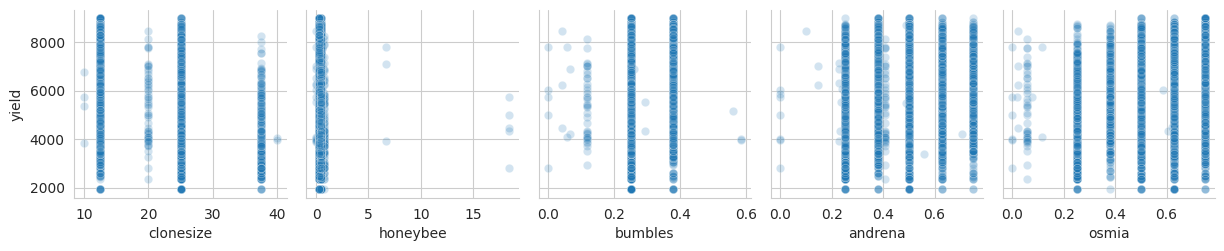

In [9]:
sns.pairplot(data=df_train, x_vars=['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia'], y_vars=['yield'], plot_kws={'alpha':0.2});

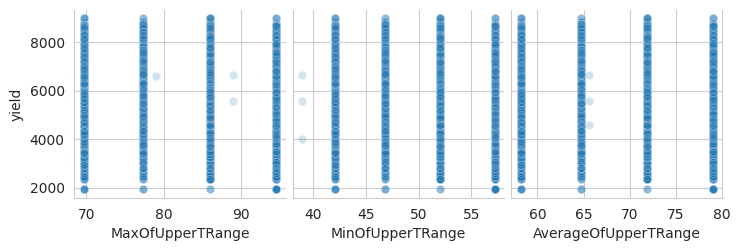

In [10]:
sns.pairplot(data=df_train, x_vars=['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange'], y_vars=['yield'], plot_kws={'alpha':0.2});

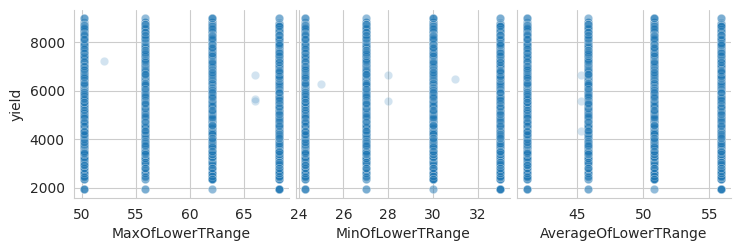

In [11]:
sns.pairplot(data=df_train, x_vars=['MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange'], y_vars=['yield'], plot_kws={'alpha':0.2});

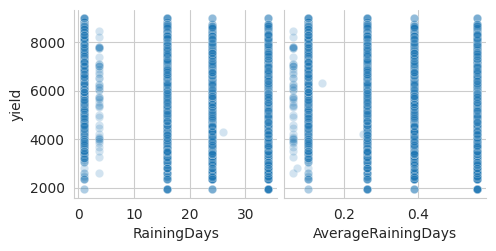

In [12]:
sns.pairplot(data=df_train, x_vars=['RainingDays', 'AverageRainingDays'], y_vars=['yield'], plot_kws={'alpha':0.2});

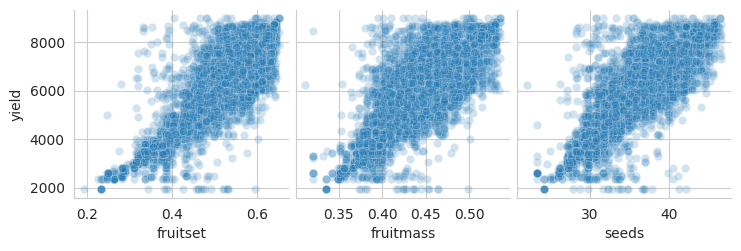

In [13]:
sns.pairplot(data=df_train, x_vars=['fruitset', 'fruitmass', 'seeds'], y_vars=['yield'], plot_kws={'alpha':0.2});

# Data Preprocessing

## Feature engineering (optional)

In [14]:
df_train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [15]:
df_train = df_train.drop("id", axis=1)

In [16]:
df_train.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [17]:
df_test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [18]:
df_test = df_test.drop("id", axis=1)

In [19]:
df_test.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


## Checking for multicolinearity 

In [20]:
# Function for checking VIF to check for multicolinearity

def VIF(df):
    '''
    Adding a constant column here.
    This is necessary for calculating the Variance Inflation Factor (VIF), 
    as VIF involves fitting a regression model and we want this model to include the intercept. 
    Without this constant column, the regression model would be forced to go through the origin (i.e., 
    where all variables are zero), which might not accurately represent our data and could lead to misleading results.
    '''
    df = df.assign(const=1)
    
    '''Calculating VIF for each column here.
       VIF of 1 : No multicolinearity
           of between 1 - 5: moderate multicolinearity
           of over 5: high multicolinearity (these features must be dealt with)
    '''
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    
    return vif_data

In [21]:
vif_results = VIF(df_train.iloc[:, :-1])
print(vif_results)

                 Feature           VIF
0              clonesize      1.376754
1               honeybee      1.120483
2                bumbles      1.151751
3                andrena      1.186737
4                  osmia      1.200157
5       MaxOfUpperTRange   3414.130675
6       MinOfUpperTRange    559.970976
7   AverageOfUpperTRange  30443.904985
8       MaxOfLowerTRange   1105.083282
9       MinOfLowerTRange  24965.147210
10  AverageOfLowerTRange  23062.819227
11           RainingDays     55.514009
12    AverageRainingDays     56.054862
13              fruitset     11.967936
14             fruitmass     12.726585
15                 seeds      9.797380
16                 const    452.702544


## Dropping redundant data to reduce multicolinearity

In [22]:
df_train = df_train.drop(["MaxOfUpperTRange", "MinOfUpperTRange", "MaxOfLowerTRange", "MinOfLowerTRange", "RainingDays" ], axis=1)

In [23]:
df_train.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,58.2,41.2,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,58.2,41.2,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,71.9,50.8,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,64.7,45.8,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,64.7,45.8,0.39,0.579677,0.494165,40.484512,7479.93417


In [24]:
df_test = df_test.drop(["MaxOfUpperTRange", "MinOfUpperTRange", "MaxOfLowerTRange", "MinOfLowerTRange", "RainingDays" ], axis=1)

In [25]:
df_test.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.25,0.25,0.25,0.25,71.9,50.8,0.39,0.399367,0.408088,31.394569
1,12.5,0.25,0.25,0.75,0.63,79.0,55.9,0.10,0.488048,0.442866,36.846956
2,12.5,0.25,0.25,0.63,0.63,71.9,50.8,0.26,0.583379,0.487057,40.037644
3,25.0,0.50,0.38,0.38,0.63,71.9,50.8,0.26,0.433014,0.422847,33.116091
4,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.39,0.360996,0.388860,29.558019


In [26]:
vif_results = VIF(df_train.iloc[:, :-1])
print(vif_results)

                 Feature           VIF
0              clonesize      1.374375
1               honeybee      1.115912
2                bumbles      1.150170
3                andrena      1.186529
4                  osmia      1.199313
5   AverageOfUpperTRange  19346.381197
6   AverageOfLowerTRange  19337.362117
7     AverageRainingDays      1.324323
8               fruitset     11.788842
9              fruitmass     12.401048
10                 seeds      9.792015
11                 const    439.728094


## Checking for missing values

In [27]:
df_train.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
AverageOfUpperTRange    0
AverageOfLowerTRange    0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [28]:
df_test.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
AverageOfUpperTRange    0
AverageOfLowerTRange    0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

## Separate features and target in the training dataset

In [29]:
X_train_df = df_train.drop(columns='yield')
y_train_df = df_train['yield']

In [30]:
X_train_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.75,0.50,58.2,41.2,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,58.2,41.2,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,71.9,50.8,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,64.7,45.8,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,64.7,45.8,0.39,0.579677,0.494165,40.484512


## Check for skewness

In [31]:
X_train_df.skew()

clonesize                0.049861
honeybee                41.613244
bumbles                  0.815571
andrena                  0.162047
osmia                   -0.845196
AverageOfUpperTRange    -0.004707
AverageOfLowerTRange     0.005105
AverageRainingDays       0.081863
fruitset                -0.426606
fruitmass               -0.055531
seeds                    0.015387
dtype: float64

In [32]:
df_test.skew()

clonesize                0.027209
honeybee                39.631323
bumbles                  0.791733
andrena                  0.190835
osmia                   -0.855134
AverageOfUpperTRange     0.001412
AverageOfLowerTRange     0.010779
AverageRainingDays       0.087598
fruitset                -0.434380
fruitmass               -0.065786
seeds                    0.009295
dtype: float64

## Check for outliers and visualize skewness

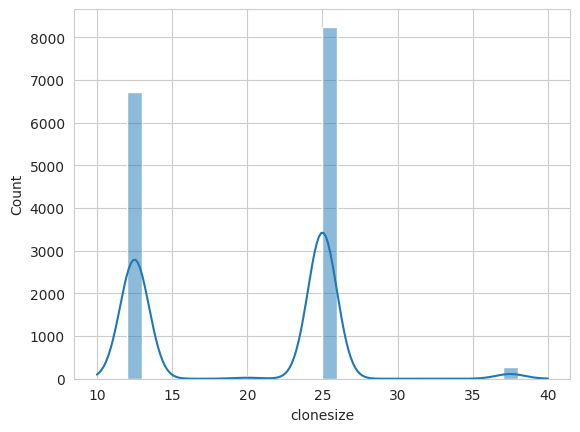

In [33]:
sns.histplot(data=X_train_df, x='clonesize', kde=True);

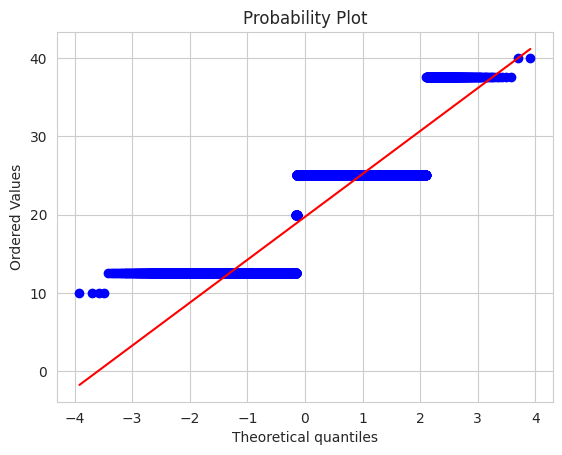

In [34]:
# Create QQ plot
qq_clonesize = stats.probplot(X_train_df['clonesize'], plot=plt);

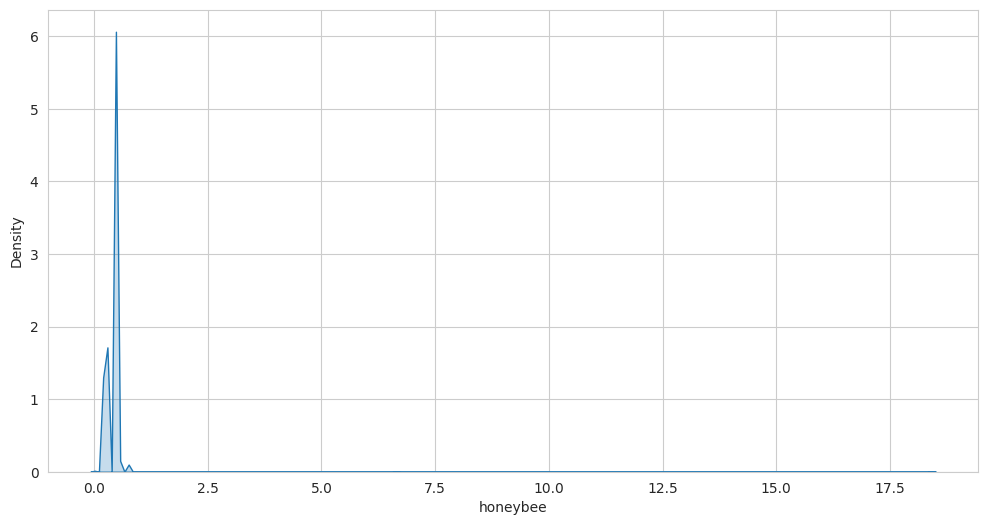

In [35]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=X_train_df, x='honeybee', bw_adjust=0.5, shade=True);

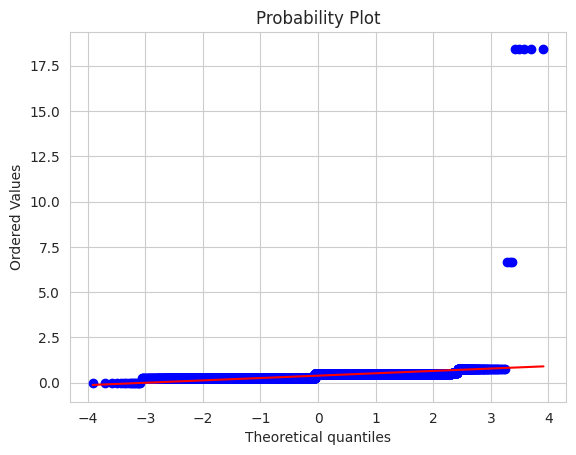

In [36]:
qq_honeybee = stats.probplot(X_train_df['honeybee'], plot=plt);

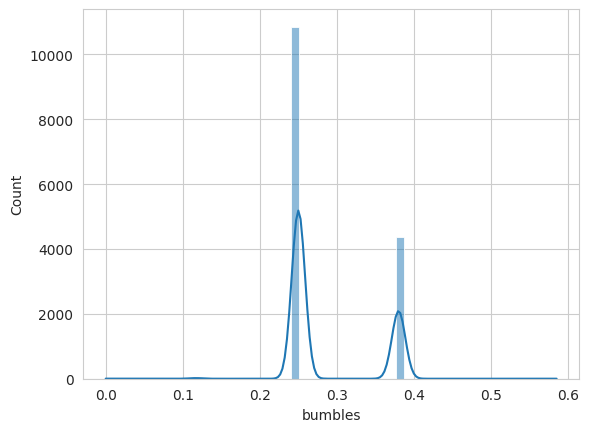

In [37]:
sns.histplot(data=X_train_df, x='bumbles', kde=True);

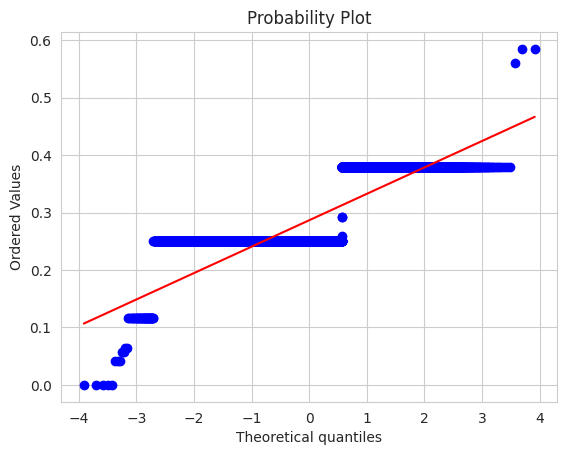

In [38]:
qq_bumbles = stats.probplot(X_train_df['bumbles'], plot=plt);

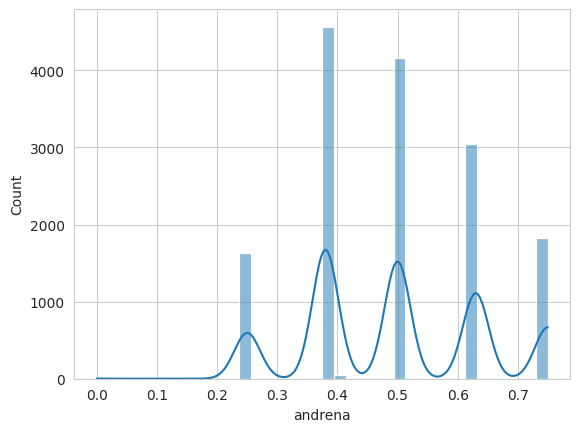

In [39]:
sns.histplot(data=X_train_df, x='andrena', kde=True);

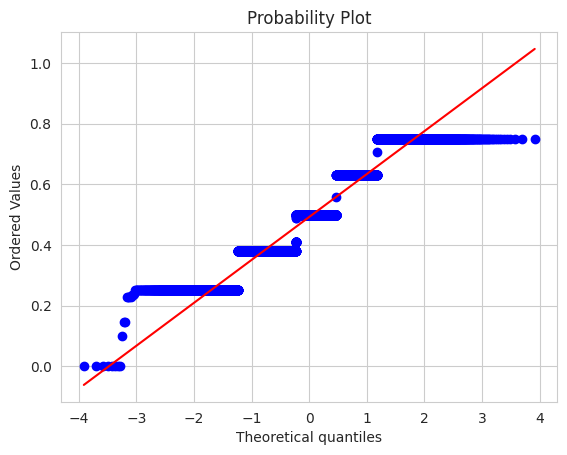

In [40]:
qq_andrena = stats.probplot(X_train_df['andrena'], plot=plt);

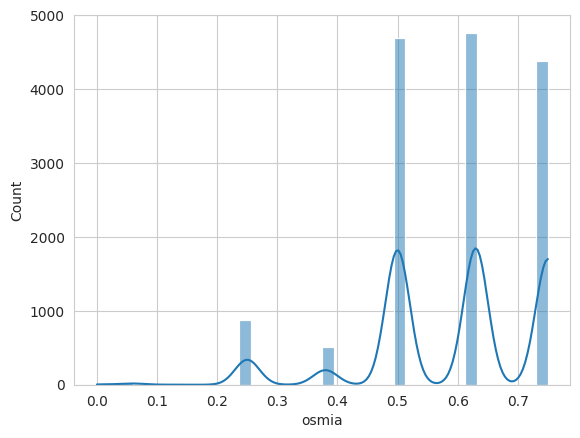

In [41]:
sns.histplot(data=X_train_df, x='osmia', kde=True);

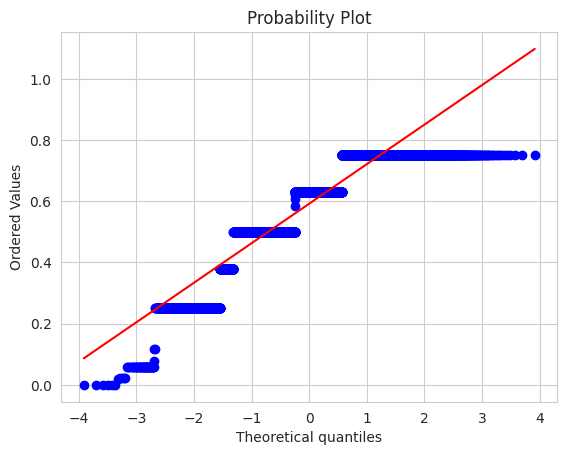

In [42]:
qq_osmia = stats.probplot(X_train_df['osmia'], plot=plt);

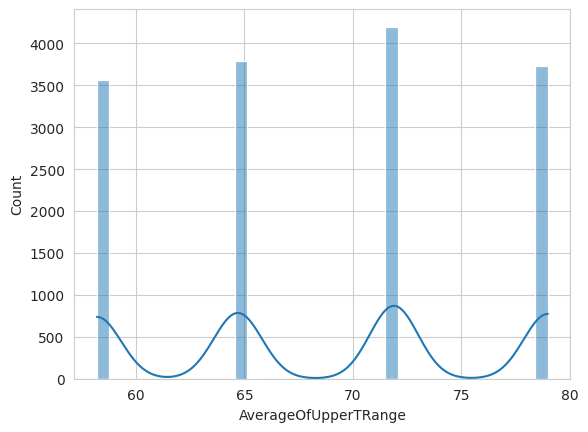

In [43]:
sns.histplot(data=X_train_df, x='AverageOfUpperTRange', kde=True);

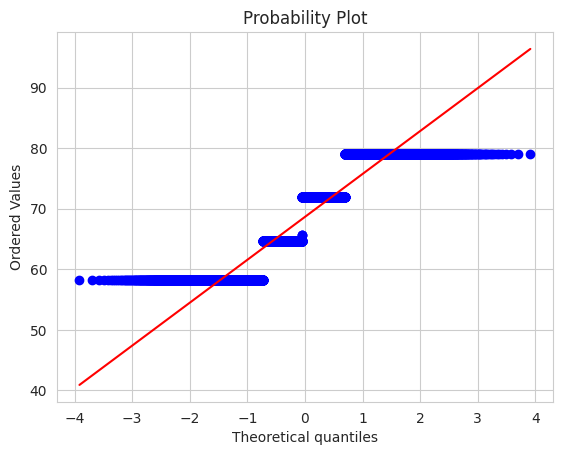

In [44]:
qq_AverageOfUpperTRange = stats.probplot(X_train_df['AverageOfUpperTRange'], plot=plt);

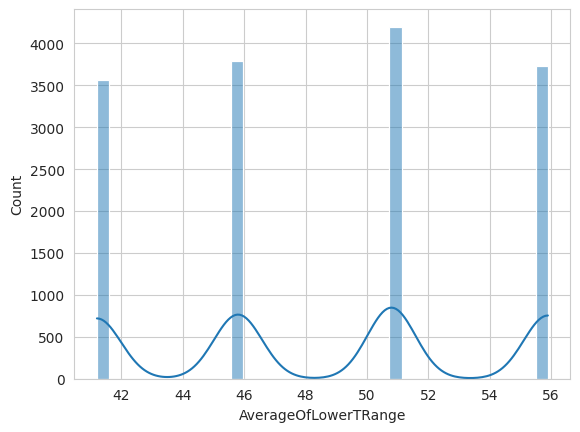

In [45]:
sns.histplot(data=X_train_df, x='AverageOfLowerTRange', kde=True);

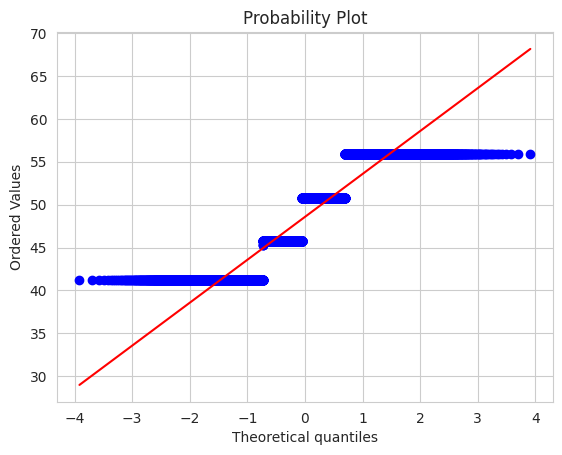

In [46]:
qq_AverageOfLowerTRange = stats.probplot(X_train_df['AverageOfLowerTRange'], plot=plt);

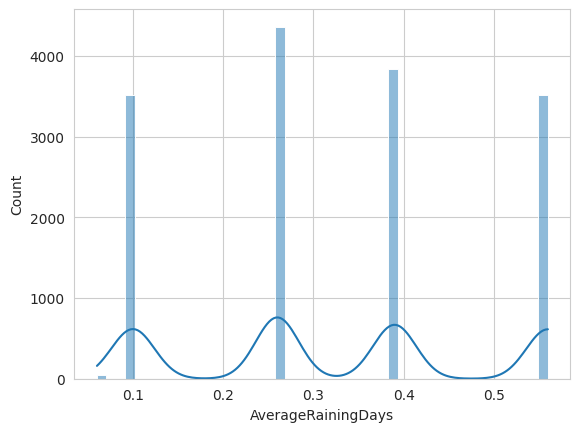

In [47]:
sns.histplot(data=X_train_df, x='AverageRainingDays', kde=True);

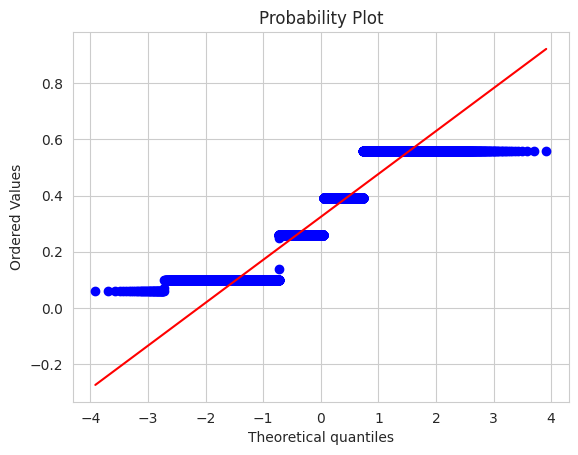

In [48]:
qq_AverageRainingDays = stats.probplot(X_train_df['AverageRainingDays'], plot=plt);

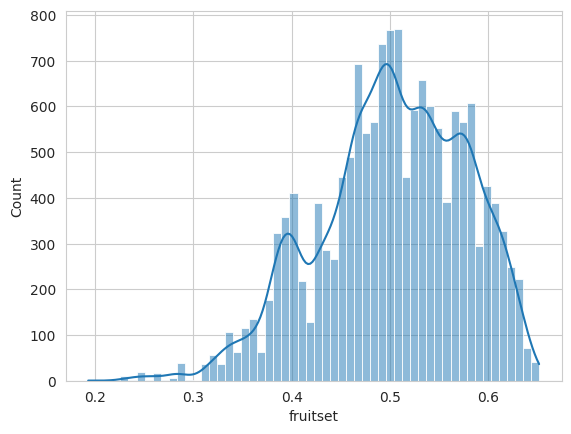

In [49]:
sns.histplot(data=X_train_df, x='fruitset', kde=True);

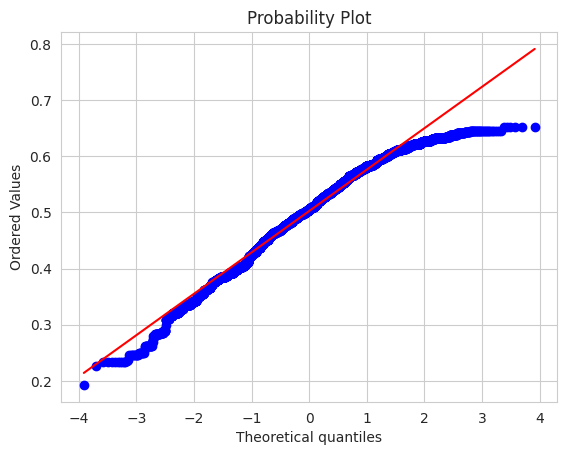

In [50]:
qq_fruitset = stats.probplot(X_train_df['fruitset'], plot=plt);

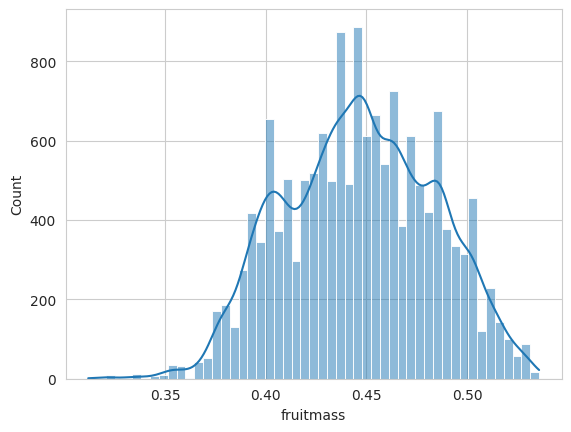

In [51]:
sns.histplot(data=X_train_df, x='fruitmass', kde=True);

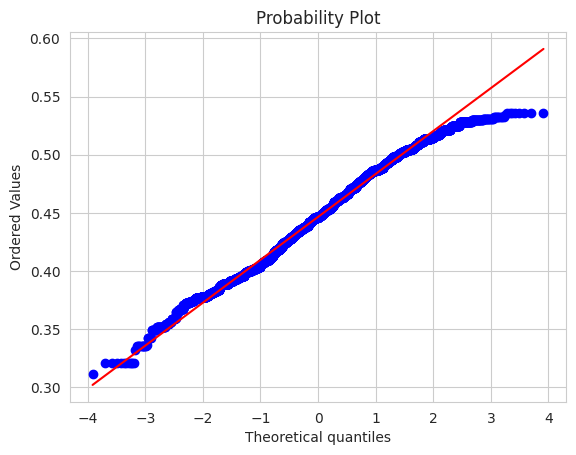

In [52]:
qq_fruitmass = stats.probplot(X_train_df['fruitmass'], plot=plt);

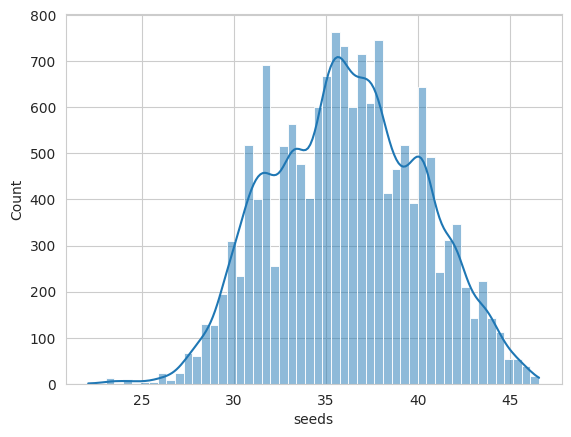

In [53]:
sns.histplot(data=X_train_df, x='seeds', kde=True);

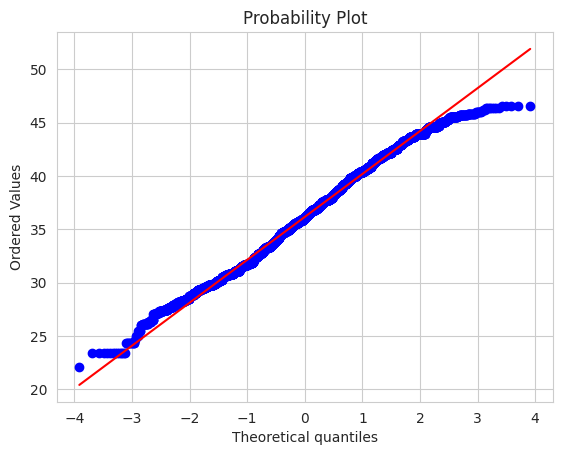

In [54]:
qq_seeds = stats.probplot(X_train_df['seeds'], plot=plt);

## Capping outliers in train dataset

In [55]:
def OUTLIER_CAP(train):
    for col in train.select_dtypes(include=[np.number]).columns:
        # Calculating IQR
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1

        # Defining bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping outliers in the training set
        train.loc[train[col] < lower_bound, col] = lower_bound
        train.loc[train[col] > upper_bound, col] = upper_bound

    return train

In [56]:
X_train_cap = OUTLIER_CAP(X_train_df)

In [57]:
X_train_cap.skew()

clonesize               0.049861
honeybee                0.044167
bumbles                 0.835939
andrena                 0.162603
osmia                  -0.789995
AverageOfUpperTRange   -0.004707
AverageOfLowerTRange    0.005105
AverageRainingDays      0.082356
fruitset               -0.357081
fruitmass              -0.045733
seeds                   0.021439
dtype: float64

In [58]:
def PRINT_SKEWED_COLUMNS(df, skew_threshold=0.5):
    
    skewed_cols = df.skew().abs().sort_values(ascending=False)
    skewed_cols = skewed_cols[skewed_cols > skew_threshold]
    
    if len(skewed_cols) == 0:
        print(None)
    else:
        print("Columns with absolute skew greater than {}:".format(skew_threshold))
        
        for col in skewed_cols.index:
            print(col)

In [59]:
PRINT_SKEWED_COLUMNS(X_train_cap)

Columns with absolute skew greater than 0.5:
bumbles
osmia


## Data Scaling

In [60]:
minmax = MinMaxScaler()

# Store column names before transformation of data by scaling
train_col = X_train_cap.columns
test_col = df_test.columns

# Data transformation by scaling
X_train_cap = minmax.fit_transform(X_train_cap)
df_test = minmax.transform(df_test)

# MinMaxScaler() returns numpy array so convert back to pandas dataframe 
X_train_cap = pd.DataFrame(X_train_cap, columns=train_col)
df_test = pd.DataFrame(df_test, columns=test_col)

## Applying Log transformation (alternative normalization technique)

In [61]:
'''def LOG_TRAN(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        # Applying log transformation to all values in the column
        df[col] = np.log(df[col] + 1)  # "+1" to ensure all values are positive

        return df'''

'def LOG_TRAN(df):\n    for col in df.select_dtypes(include=[np.number]).columns:\n        # Applying log transformation to all values in the column\n        df[col] = np.log(df[col] + 1)  # "+1" to ensure all values are positive\n\n        return df'

In [62]:
'''X_train_cap = LOG_TRAN(X_train_cap)
df_test = LOG_TRAN(df_test)'''

'X_train_cap = LOG_TRAN(X_train_cap)\ndf_test = LOG_TRAN(df_test)'

In [63]:
X_train_cap.skew()

clonesize               0.049861
honeybee                0.044167
bumbles                 0.835939
andrena                 0.162603
osmia                  -0.789995
AverageOfUpperTRange   -0.004707
AverageOfLowerTRange    0.005105
AverageRainingDays      0.082356
fruitset               -0.357081
fruitmass              -0.045733
seeds                   0.021439
dtype: float64

In [64]:
PRINT_SKEWED_COLUMNS(X_train_cap)

Columns with absolute skew greater than 0.5:
bumbles
osmia


Log transformation can actually make your skewness worse. It can't handle negative skewness

## Yeo-Johnson method to reduce skewness

The Yeo-Johnson method to reduce skewness can handle both positive and negative skewness

In [65]:
# Store column names before transformation of data by scaling
train_col = X_train_cap.columns
test_col = df_test.columns

yeo_john = PowerTransformer(method='yeo-johnson')

X_train_yj = yeo_john.fit_transform(X_train_cap)
df_test = yeo_john.transform(df_test)

# convert back to DataFrame
X_train_yj = pd.DataFrame(X_train_yj, columns=train_col)
df_test = pd.DataFrame(df_test, columns=test_col)

In [66]:
X_train_yj.skew()

clonesize              -0.035830
honeybee               -0.011226
bumbles                -0.217522
andrena                -0.006641
osmia                  -0.137102
AverageOfUpperTRange   -0.079939
AverageOfLowerTRange   -0.076680
AverageRainingDays     -0.046383
fruitset               -0.065138
fruitmass              -0.026183
seeds                  -0.017817
dtype: float64

In [67]:
PRINT_SKEWED_COLUMNS(X_train_yj)

None


## Data Splitting for Train, Validation, Test Datasets

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_train_yj, y_train_df, test_size=0.30, random_state=69)

# df_test will be left for final model testing

# Modeling Helper Functions

In [69]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [70]:
#Intended to be used in conjunction with GridsearchCV()
def MODEL_RUNNER(model,X_train,y_train,X_val,y_val):
    
    # Fit model
    model.fit(X_train,y_train)
    
    # Get metrics
    
    predictions = model.best_estimator_.predict(X_val)
    
    # Comparing Predictions vs y_Test
    print(f"Best-estimator predictions: {predictions}")
    
    print("")
    
    print(f"y_val: {y_val}")
    
    print("")   

In [71]:
# Model running function only for linear regression since no GridSearchCV will be used with this model
def LINEAR_MOD_RUN(model,X_train,y_train,X_val,y_val):
    
    # Fit model
    model.fit(X_train,y_train)
    
    # Get metrics
    
    predictions = model.predict(X_val)
    
    mae = mean_absolute_error(y_val, predictions)
    print(f'Mean Absolute Error : {mae}')
    
    # for formatting
    print("")
    
    rmse = np.sqrt(mean_squared_error(y_val,predictions))
    print(f'Root Mean Squared Error : {rmse}')
    
    # for formatting
    print("")
    
    # Comparing Predictions vs y_Test
    print(f"Predictions: {predictions}")
    
    print("")
    
    print(f"y_val: {y_val}")
    
    print("")   

# Notes on measures of accuracy
### Smaller RMSE ---> greater accuracy
### Smaller MAE ---> greater accuracy

# Linear Regression

In [72]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [73]:
linear_model = LinearRegression()
LINEAR_MOD_RUN(linear_model,X_train,y_train,X_val,y_val)

Mean Absolute Error : 368.77104134492

Root Mean Squared Error : 567.116720449051

Predictions: [5524.21238988 7312.27775769 6223.84937797 ... 5681.59851332 7991.76861296
 2872.23894776]

y_val: 10788    5531.35174
14606    7443.62446
6956     5954.51315
3804     4387.74185
14784    5597.02216
            ...    
12960    6539.11085
1698     3784.11935
2359     6683.20061
7608     8969.40184
4998     2384.72892
Name: yield, Length: 4587, dtype: float64



## Ridge Regression

In [74]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [75]:
# must read documentation and do research on hyperparameters to tune per model...
# to create appropriate "param_grid" dictionaries per model.
# must research how to chose k-folds(cv)

In [76]:
ridge_model = Ridge()

In [77]:
param_grid = {'alpha': [0.1, 1.0, 10.0]}

In [78]:
ridge_grid = GridSearchCV(estimator=ridge_model, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv=10, 
                    verbose=2)

In [79]:
MODEL_RUNNER(ridge_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .......................................

In [80]:
print("Best estimator found: ", ridge_grid.best_estimator_)
print("Best parameters found: ", ridge_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-ridge_grid.best_score_))
print("Lowest MAE found: ", -ridge_grid.best_score_)

Best estimator found:  Ridge()
Best parameters found:  {'alpha': 1.0}
Lowest RMSE found:  19.72138223509508
Lowest MAE found:  388.9329172627239


## Lasso Regression

In [81]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [82]:
lasso_model = Lasso()

In [83]:
param_grid = {'alpha': [0.1, 1.0, 10.0]}

In [84]:
lasso_grid = GridSearchCV(estimator=lasso_model, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv=10, 
                    verbose=2)

In [85]:
MODEL_RUNNER(lasso_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END .......................................

In [86]:
print("Best estimator found: ", lasso_grid.best_estimator_)
print("Best parameters found: ", lasso_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-lasso_grid.best_score_))
print("Lowest MAE found: ", -lasso_grid.best_score_)

Best estimator found:  Lasso(alpha=0.1)
Best parameters found:  {'alpha': 0.1}
Lowest RMSE found:  19.72150239096014
Lowest MAE found:  388.9376565566466


## ElasticNet Regression

In [87]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [88]:
elasticn_model = ElasticNet()

In [89]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]}

In [90]:
elasticn_grid = GridSearchCV(estimator=elasticn_model, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv=10, 
                    verbose=2)

In [91]:
MODEL_RUNNER(elasticn_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, 

In [92]:
print("Best estimator found: ", elasticn_grid.best_estimator_)
print("Best parameters found: ", elasticn_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-elasticn_grid.best_score_))
print("Lowest MAE found: ", -elasticn_grid.best_score_)

Best estimator found:  ElasticNet(alpha=0.1, l1_ratio=0.9)
Best parameters found:  {'alpha': 0.1, 'l1_ratio': 0.9}
Lowest RMSE found:  19.766039747263882
Lowest MAE found:  390.6963272904157


# Polynomial Regression

In [93]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.

In [94]:
pipe = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                       ('linearregression', LinearRegression())])

In [95]:
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4]}
poly_grid = GridSearchCV(estimator=pipe, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv=10, 
                    verbose=2)

In [96]:
MODEL_RUNNER(poly_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.2s
[CV] END .......................polynomialfeatur

In [97]:
print("Best estimator found: ", poly_grid.best_estimator_)
print("Best parameters found: ", poly_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-poly_grid.best_score_))
print("Lowest MAE found: ", -poly_grid.best_score_)

Best estimator found:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
Best parameters found:  {'polynomialfeatures__degree': 2}
Lowest RMSE found:  19.308164957882692
Lowest MAE found:  372.80523404080907


# LAD Regression

In [98]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html

In [99]:
#LAD Regression is a linear regression model fitted using the quantile loss function with q=0.5
lad_model = QuantileRegressor(solver='highs')

In [100]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],  # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    'quantile': [0.5]  # The quantile to be estimated. It is a value between 0 and 1[0.5 = LAD].
}

In [101]:
lad_grid = GridSearchCV(estimator=lad_model, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv=10, 
                    verbose=2)

In [102]:
MODEL_RUNNER(lad_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.3s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.3s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.2s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.5s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.7s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.8s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.7s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.4s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.3s
[CV] END .......alpha=0.01, fit_intercept=True, quantile=0.5; total time=   4.2s
[CV] END ......alpha=0.01, fit_intercept=False, quantile=0.5; total time=   3.8s
[CV] END ......alpha=0.01, fit_intercept=False

In [103]:
print("Best estimator found: ", lad_grid.best_estimator_)
print("Best parameters found: ", lad_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-lad_grid.best_score_))
print("Lowest MAE found: ", -lad_grid.best_score_)

Best estimator found:  QuantileRegressor(alpha=0.01, solver='highs')
Best parameters found:  {'alpha': 0.01, 'fit_intercept': True, 'quantile': 0.5}
Lowest RMSE found:  19.72293323201564
Lowest MAE found:  388.994095274547


# KNN Regression

In [104]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [105]:
param_grid = {'n_neighbors': [1, 5, 10]}

In [106]:
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(estimator=knn, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv=10, 
                    verbose=2)

In [107]:
MODEL_RUNNER(knn_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n

In [108]:
print("Best estimator found: ", knn_grid.best_estimator_)
print("Best parameters found: ", knn_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-knn_grid.best_score_))
print("Lowest MAE found: ", -knn_grid.best_score_)

Best estimator found:  KNeighborsRegressor(n_neighbors=10)
Best parameters found:  {'n_neighbors': 10}
Lowest RMSE found:  20.938226539005186
Lowest MAE found:  438.40933059870105


# Decision Tree Regression

In [109]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [110]:
dtree_model = DecisionTreeRegressor()

In [111]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]}

dtree_grid = GridSearchCV(estimator=dtree_model, 
                        param_grid=param_grid, 
                        scoring='neg_mean_absolute_error',
                        cv=10,
                        verbose=2)

In [112]:
MODEL_RUNNER(dtree_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_l

In [113]:
print("Best estimator found: ", dtree_grid.best_estimator_)
print("Best parameters found: ", dtree_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-dtree_grid.best_score_))
print("Lowest MAE found: ", -dtree_grid.best_score_)
print("Number of terminal nodes", dtree_grid.best_estimator_.get_n_leaves())

Best estimator found:  DecisionTreeRegressor(max_depth=7, min_samples_split=10)
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Lowest RMSE found:  19.381278625251998
Lowest MAE found:  375.63396114965
Number of terminal nodes 107


# Support Vector Regression

In [114]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [115]:
param_grid = {
              'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']
             }

In [116]:
svr = SVR()
svr_grid = GridSearchCV(estimator=svr, 
                        param_grid=param_grid, 
                        scoring='neg_mean_absolute_error',
                        cv=10,
                        verbose=2)

In [117]:
MODEL_RUNNER(svr_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END .................................C=0.01, gamma=auto; total time=   5.5s
[CV] END .................................C=0.01, gamma=auto; total time=   5.5s
[CV] END .................................C=0.01, gamma=auto; total time=   5.4s
[CV] END .................................C=0.01, gamma=auto; total time=   5.5s
[CV] END .................................C=0.01, gamma=auto; total time=   5.4s
[CV] END .................................C=0.01, gamma=auto; total time=   5.5s
[CV] END .................................C=0.01, gamma=auto; total time=   5.6s
[CV] END .................................C=0.01, gamma=auto; total time=   5.6s
[CV] END .................................C=0.01, gamma=auto; total time=   5.5s
[CV] END .................................C=0.01, gamma=auto; total time=   5.4s
[CV] END ................................C=0.01, gamma=scale; total time=   5.5s
[CV] END ................................C=0.0

In [118]:
print("Best estimator found: ", svr_grid.best_estimator_)
print("Best parameters found: ", svr_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-svr_grid.best_score_))
print("Lowest MAE found: ", -svr_grid.best_score_)

Best estimator found:  SVR(C=1000)
Best parameters found:  {'C': 1000, 'gamma': 'scale'}
Lowest RMSE found:  19.121465460771674
Lowest MAE found:  365.630441367484


# Random Forest Regression

In [119]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [120]:
randomf_model = RandomForestRegressor()

In [121]:
param_grid = {'n_estimators': [10, 50, 100]}

In [122]:
randomf_grid = GridSearchCV(estimator=randomf_model, 
                        param_grid=param_grid, 
                        scoring='neg_mean_absolute_error',
                        cv=10,
                        verbose=2)

In [123]:
MODEL_RUNNER(randomf_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   2.3s
[CV] END ....................................n_e

In [124]:
print("Best estimator found: ", randomf_grid.best_estimator_)
print("Best parameters found: ", randomf_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-randomf_grid.best_score_))
print("Lowest MAE found: ", -randomf_grid.best_score_)

n_leaves = [estimator.get_n_leaves() for estimator in randomf_grid.best_estimator_.estimators_]
print("Number of terminal nodes for each tree: ", n_leaves)

Best estimator found:  RandomForestRegressor()
Best parameters found:  {'n_estimators': 100}
Lowest RMSE found:  19.37590574212472
Lowest MAE found:  375.4257233277017
Number of terminal nodes for each tree:  [6647, 6638, 6647, 6531, 6633, 6630, 6566, 6644, 6654, 6570, 6533, 6554, 6595, 6560, 6606, 6522, 6591, 6526, 6583, 6599, 6609, 6544, 6621, 6598, 6565, 6594, 6609, 6536, 6537, 6597, 6541, 6633, 6585, 6519, 6597, 6579, 6535, 6541, 6564, 6595, 6550, 6601, 6601, 6607, 6599, 6581, 6575, 6636, 6504, 6589, 6555, 6586, 6574, 6552, 6591, 6574, 6606, 6518, 6571, 6576, 6551, 6582, 6638, 6541, 6583, 6600, 6592, 6590, 6597, 6541, 6556, 6545, 6564, 6567, 6583, 6527, 6602, 6585, 6527, 6603, 6551, 6579, 6540, 6533, 6568, 6569, 6572, 6585, 6571, 6569, 6546, 6575, 6517, 6476, 6616, 6604, 6556, 6574, 6583, 6516]


# Gradient Boosting Regression

In [125]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [126]:
gradientb_model = GradientBoostingRegressor()

In [127]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]}

In [128]:
gradientb_grid = GridSearchCV(estimator=gradientb_model, 
                        param_grid=param_grid, 
                        scoring='neg_mean_absolute_error',
                        cv=10,
                        verbose=2)

In [129]:
MODEL_RUNNER(gradientb_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [130]:
print("Best estimator found: ", gradientb_grid.best_estimator_)
print("Best parameters found: ", gradientb_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-gradientb_grid.best_score_))
print("Lowest MAE found: ", -gradientb_grid.best_score_)

Best estimator found:  GradientBoostingRegressor()
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Lowest RMSE found:  19.03961426236773
Lowest MAE found:  362.50691125975675


# Adaboost Regression

In [131]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [132]:
ada_model = AdaBoostRegressor()

In [133]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]}

In [134]:
ada_grid = GridSearchCV(estimator=ada_model, 
                        param_grid=param_grid, 
                        scoring='neg_mean_absolute_error',
                        cv=10,
                        verbose=2)

In [135]:
MODEL_RUNNER(ada_grid,X_train,y_train,X_val,y_val)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_es

In [136]:
print("Best estimator found: ", ada_grid.best_estimator_)
print("Best parameters found: ", ada_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(-ada_grid.best_score_))
print("Lowest MAE found: ", -ada_grid.best_score_)

Best estimator found:  AdaBoostRegressor(learning_rate=0.01, n_estimators=100)
Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 100}
Lowest RMSE found:  20.129351363398218
Lowest MAE found:  405.19078631114166


# Selection of Best Model & Final Training

In [150]:
final_model = gradientb_grid.best_estimator_

y_pred = final_model.predict(df_test)

print(f'Predictions for test set : {y_pred}')

Predictions for test set : [4176.5655546  6063.48882467 7180.21190968 ... 6518.77584691 4423.68200323
 7295.4052952 ]


# Saving the Model

In [151]:
import joblib

In [190]:
joblib.dump(final_model, 'Blueberry_Yield_Best_Model.pkl')

['Blueberry_Yield_Best_Model.pkl']

## Saving feature names

In [153]:
feature_names = list(X_train.columns)

In [191]:
joblib.dump(feature_names, 'Blueberry_Yield_Feature_Names.pkl')

['Blueberry_Yield_Feature_Names.pkl']

# Table for Kaggle competition submission

In [168]:
print(df_test.columns)

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfUpperTRange', 'AverageOfLowerTRange', 'AverageRainingDays',
       'fruitset', 'fruitmass', 'seeds'],
      dtype='object')


In [169]:
df_test

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,0.818334,-1.025734,-0.568892,-1.732764,-1.983240,0.452514,0.444420,0.442616,-1.369206,-1.040286,-1.187720
1,-1.101770,-1.025734,-0.568892,1.656583,0.151698,1.322343,1.326430,-1.418922,-0.273403,-0.104666,0.177543
2,-1.101770,-1.025734,-0.568892,0.935374,0.151698,0.452514,0.444420,-0.345389,1.128004,1.095936,0.961426
3,0.818334,0.915363,1.482003,-0.741831,0.151698,0.452514,0.444420,-0.345389,-0.977018,-0.644296,-0.752861
4,2.448567,2.593352,-0.568892,-1.732764,-1.983240,1.322343,1.326430,0.442616,-1.781269,-1.553704,-1.655862
...,...,...,...,...,...,...,...,...,...,...,...
10189,0.818334,-1.025734,-0.568892,-1.732764,-1.983240,0.452514,0.444420,0.442616,-0.458210,-0.238164,-0.399582
10190,0.818334,0.915363,-0.568892,0.096147,1.291043,-0.486820,-0.480529,-0.345389,-0.343103,-0.163835,-0.119695
10191,0.818334,0.915363,1.482003,0.096147,-0.804519,-0.486820,-0.480529,-0.345389,0.899525,0.442566,0.394222
10192,-1.101770,-1.025734,-0.568892,-0.741831,-0.804519,1.322343,1.326430,1.388947,-1.278497,-1.008885,-1.064256


In [192]:
df_test_with_id = df_test.copy()
df_test_with_id['id'] = range(len(df_test_with_id))

In [196]:
df_test_with_id

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,id
0,0.818334,-1.025734,-0.568892,-1.732764,-1.983240,0.452514,0.444420,0.442616,-1.369206,-1.040286,-1.187720,0
1,-1.101770,-1.025734,-0.568892,1.656583,0.151698,1.322343,1.326430,-1.418922,-0.273403,-0.104666,0.177543,1
2,-1.101770,-1.025734,-0.568892,0.935374,0.151698,0.452514,0.444420,-0.345389,1.128004,1.095936,0.961426,2
3,0.818334,0.915363,1.482003,-0.741831,0.151698,0.452514,0.444420,-0.345389,-0.977018,-0.644296,-0.752861,3
4,2.448567,2.593352,-0.568892,-1.732764,-1.983240,1.322343,1.326430,0.442616,-1.781269,-1.553704,-1.655862,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10189,0.818334,-1.025734,-0.568892,-1.732764,-1.983240,0.452514,0.444420,0.442616,-0.458210,-0.238164,-0.399582,10189
10190,0.818334,0.915363,-0.568892,0.096147,1.291043,-0.486820,-0.480529,-0.345389,-0.343103,-0.163835,-0.119695,10190
10191,0.818334,0.915363,1.482003,0.096147,-0.804519,-0.486820,-0.480529,-0.345389,0.899525,0.442566,0.394222,10191
10192,-1.101770,-1.025734,-0.568892,-0.741831,-0.804519,1.322343,1.326430,1.388947,-1.278497,-1.008885,-1.064256,10192


In [197]:
column_order = ['id'] + [col for col in df_test_with_id if col != 'id']

# Reorder the DataFrame columns
df_test_with_id = df_test_with_id[column_order]

In [198]:
df_test_with_id

,id,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,0,0.818334,-1.025734,-0.568892,-1.732764,-1.983240,0.452514,0.444420,0.442616,-1.369206,-1.040286,-1.187720
1,1,-1.101770,-1.025734,-0.568892,1.656583,0.151698,1.322343,1.326430,-1.418922,-0.273403,-0.104666,0.177543
2,2,-1.101770,-1.025734,-0.568892,0.935374,0.151698,0.452514,0.444420,-0.345389,1.128004,1.095936,0.961426
3,3,0.818334,0.915363,1.482003,-0.741831,0.151698,0.452514,0.444420,-0.345389,-0.977018,-0.644296,-0.752861
4,4,2.448567,2.593352,-0.568892,-1.732764,-1.983240,1.322343,1.326430,0.442616,-1.781269,-1.553704,-1.655862
...,...,...,...,...,...,...,...,...,...,...,...,...
10189,10189,0.818334,-1.025734,-0.568892,-1.732764,-1.983240,0.452514,0.444420,0.442616,-0.458210,-0.238164,-0.399582
10190,10190,0.818334,0.915363,-0.568892,0.096147,1.291043,-0.486820,-0.480529,-0.345389,-0.343103,-0.163835,-0.119695
10191,10191,0.818334,0.915363,1.482003,0.096147,-0.804519,-0.486820,-0.480529,-0.345389,0.899525,0.442566,0.394222
10192,10192,-1.101770,-1.025734,-0.568892,-0.741831,-0.804519,1.322343,1.326430,1.388947,-1.278497,-1.008885,-1.064256


In [199]:
# DataFrame for Kaggle submission
blue_submission = pd.DataFrame({
    'id': df_test_with_id['id'],   # test_ids is the list/array of IDs in your test set
    'yield': y_pred
})

#Saveing the DataFrame to a csv file
blue_submission.to_csv('blueberry_yield_submission.csv', index=False)